# Final Project 

# Group 25

# Group Members:

- Anant Patel (W0756333) – Section 1 

- Rushil Patel (W0755980) – Section 1

- Darshankumar Patel (W0753849) – Section 2

- Parth Sutariya (W0756042) – Section 5

- Ruchita Tamboli (W0756325) – Section 5


### Topic

**- Bank Marketing**

**- Project Definition :** To predict the term deposit subscription in Bank, whether the customer is going to subscribe the term deposit in Bank or not ? 
- This is classification problem for bank marketing team for their improvements in forth coming strategies for customers.

- How can the financial institution have a greater effectiveness for future marketing campaigns? In order to answer this, we have to analyze the last marketing campaign the bank performed and identify the patterns that will help us find conclusions in order to develop future strategies.

## Term Deposit


- A Term deposit is a deposit that a bank or a financial institution offers with a fixed rate that is often better than just opening deposit account in which your money will be returned back at a specific maturity time. 



**- KEY TAKEAWAYS :**
1. A term deposit is a type of deposit account held at a financial institution where money is locked up for some set period of time.
2. Term deposits are usually short-term deposits with maturities ranging from one month to a few years.
3. Typically, term deposits offer higher interest rates than traditional liquid savings accounts, whereby customers can withdraw their money at any time.

## Approach

**In order to optimize marketing campaigns with the help of the dataset, we will have to take the following steps:**

- Import data from dataset and perform initial high-level analysis: look at the number of rows, look at the missing values, look at dataset columns and their values respective to the campaign outcome.
- Clean the data: remove irrelevant columns, deal with missing and incorrect values, turn categorical columns into dummy variables.
- Use machine learning techniques to predict the marketing campaign outcome and to find out factors, which affect the success of the campaign.

**Who are the deposit customers that is the most common problem any bank would have right now.**

**So, let's do some analysis to solve this problem for financial institutions**

**Import required python libraries for bank analysis**

In [137]:
                                 # Importing required Packages for analysis

import pandas as pd              # Data Operations, Data Structures
import numpy as np               # Mathematical operation, array 
import matplotlib.pyplot as plt  # Data Visualization
import seaborn as sns            # Data Visualization

**Dataset Imormation**

**About client features:**
-age
-job (type of job)
-marital (marital status)
-education
-default (has credit in default? 'no','yes','unknown')
-balance
-housing (has housing loan?'no','yes','unknown')
-loan (has personal loan?'no','yes','unknown')

**About current campaign:**
-contact (communication type: 'cellular','telephone')
-duration (last contact duration, in seconds) Important note: the duration attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
-day (last contact day of the week)
-month (last contact month of year)
-campaign (number of contacts performed during this campaign and for this client)
-deposit (has the client subscribed a term deposit?'yes','no')

**About previous contacts/campaign:**
-pdays (number of days that passed by after the client was last contacted from a previous campaign, 999 means client was not previously contacted)
-previous (number of contacts performed before this campaign and for this client)
-poutcome (outcome of the previous marketing campaign: 'failure','nonexistent','success')

**The dataset is "Bank Marketing Dataset"** 
**-   First and formost step is to import data in order to do analysis.**

In [138]:
Bank_df = pd.read_csv('D:/Study/DAB/SEM 3/ML/project/bank.csv')         # Importing Bank Marketing dataset 

# EDA - Exploratory Data Analysis

**Displaying overview of the dataset to have look on few records for general idea about what we have got**

In [139]:
Bank_df.head()        # Printing first few records

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

**Printing out size of the dataset - Number of rows and columns**

In [140]:
Bank_df.shape                # size of the dataset

(11162, 17)

**This dataset has 11162 rows and 17 columns**

**Viewing statistical details**

In [141]:
Bank_df.describe()          # Some statistics of numeric columns 

age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  
max      854.000000     58.000000

**Summary of the dataframe**

In [142]:
Bank_df.info()           # Looking at summary of this dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


**Looking unique values in categorical values**


**Features and label checking**

In [143]:
for column in Bank_df.select_dtypes(include='object').columns:
    print(column)
    print(Bank_df[column].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


**It can be seen that deposit can be used for label y and is holding the answer as yes or no.**

**Checking Missing values**

**Is there any missing values or null values or empty spaces in data.?**

In [144]:
Bank_df.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

**Based on the output, it looks there is no missing value or null values.**

**Thus, no need to fill or replace values**

**Let's see how many "Unwanted columns" which are not practically required for performing analysis**

In [145]:
Bank_df.groupby(['deposit','default']).size()             #defaut feature does not play important role

deposit  default
no       no         5757
         yes         116
yes      no         5237
         yes          52
dtype: int64

In [146]:
# Deafult column doesn't seem usefull here in this analysis


Bank_df.drop(['default'], axis=1, inplace=True)
Bank_df.head()


age         job  marital  education  balance housing loan  contact  day  \
0   59      admin.  married  secondary     2343     yes   no  unknown    5   
1   56      admin.  married  secondary       45      no   no  unknown    5   
2   41  technician  married  secondary     1270     yes   no  unknown    5   
3   55    services  married  secondary     2476     yes   no  unknown    5   
4   54      admin.  married   tertiary      184      no   no  unknown    5   

  month  duration  campaign  pdays  previous poutcome deposit  
0   may      1042         1     -1         0  unknown     yes  
1   may      1467         1     -1         0  unknown     yes  
2   may      1389         1     -1         0  unknown     yes  
3   may       579         1     -1         0  unknown     yes  
4   may       673         2     -1         0  unknown     yes

In [147]:
Bank_df.groupby(['deposit','pdays']).size()           # pdays looks a bit odd, let's see it's values

deposit  pdays
no       -1       4940
          1          2
          2          6
          5          2
          6          2
                  ... 
yes       804        1
          805        1
          828        1
          842        1
          854        1
Length: 732, dtype: int64

In [148]:
# pdays column has a lot of values in negative


Bank_df.drop(['pdays'],axis=1, inplace=True)
Bank_df.head()

age         job  marital  education  balance housing loan  contact  day  \
0   59      admin.  married  secondary     2343     yes   no  unknown    5   
1   56      admin.  married  secondary       45      no   no  unknown    5   
2   41  technician  married  secondary     1270     yes   no  unknown    5   
3   55    services  married  secondary     2476     yes   no  unknown    5   
4   54      admin.  married   tertiary      184      no   no  unknown    5   

  month  duration  campaign  previous poutcome deposit  
0   may      1042         1         0  unknown     yes  
1   may      1467         1         0  unknown     yes  
2   may      1389         1         0  unknown     yes  
3   may       579         1         0  unknown     yes  
4   may       673         2         0  unknown     yes

**Till now, there were two columns that were not playing that much important in terms of analysis**

**They have been dropped from the dataframe**

**Let's see how many different/unique values each features has in Bank dataframe** 

In [149]:
for column in Bank_df.columns:
    print(column, Bank_df[column].nunique())

age 76
job 12
marital 3
education 4
balance 3805
housing 2
loan 2
contact 3
day 31
month 12
duration 1428
campaign 36
previous 34
poutcome 4
deposit 2


**There are many columns having minimum categorical values with two different values and there are some numerical values too**

**It seems that there is no feature having a single value**

In [150]:
Bank_df.columns.nunique()

15

**Defining the categorical features**

In [151]:
categorical_features=[feature for feature in Bank_df.columns if ((Bank_df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [152]:
for feature in categorical_features:
    print(feature,len(Bank_df[feature].unique()))

job 12
marital 3
education 4
housing 2
loan 2
contact 3
month 12
poutcome 4


**There are in total 8 categorical features**

**It shows job feature has maximum categorical values while housing and loan have least categorical values with 2-2**

**Let's check the relationship between features and dependant variable with different visualization charts**

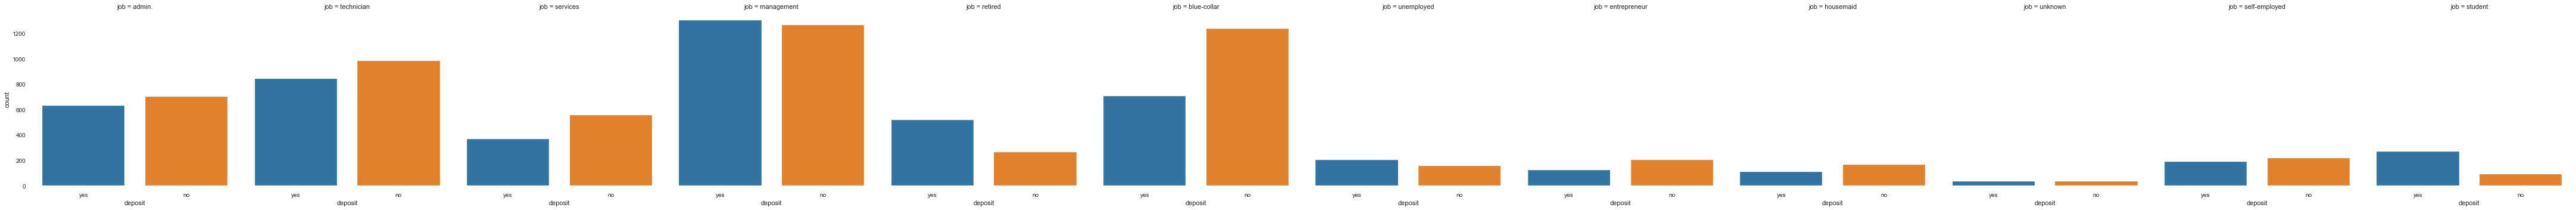

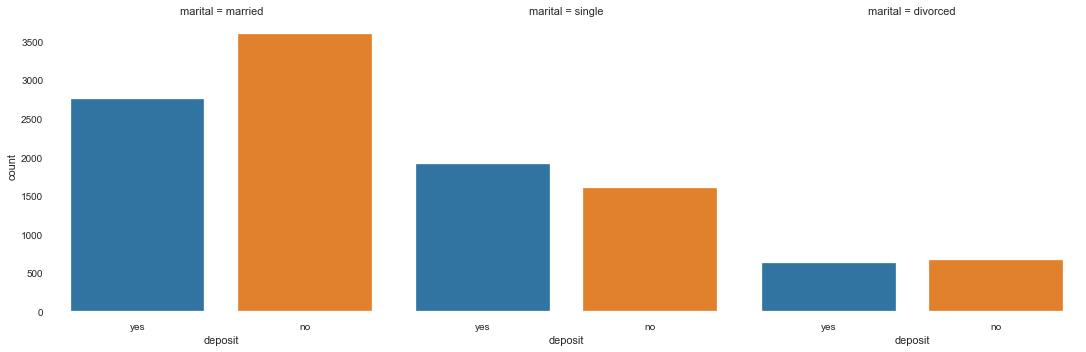

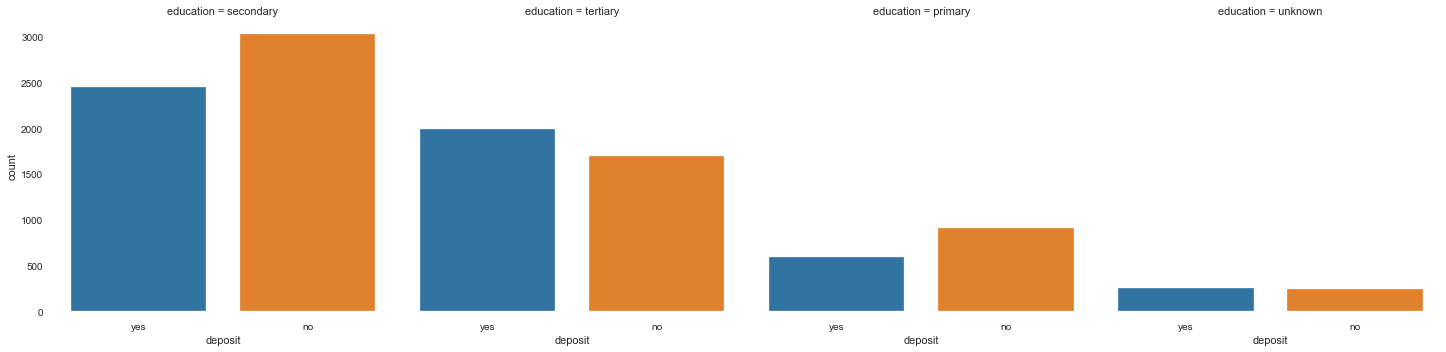

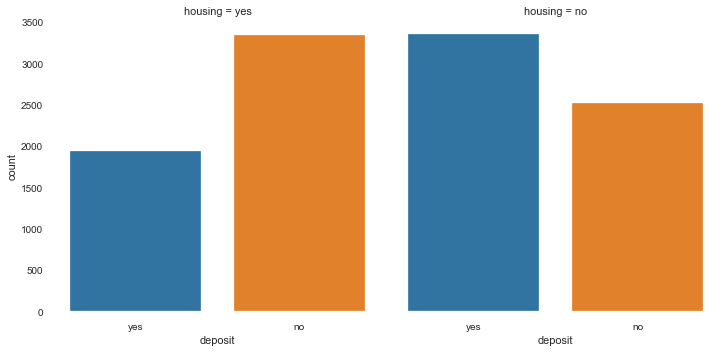

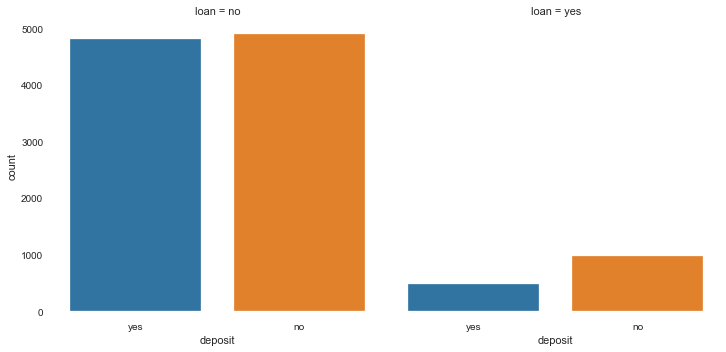

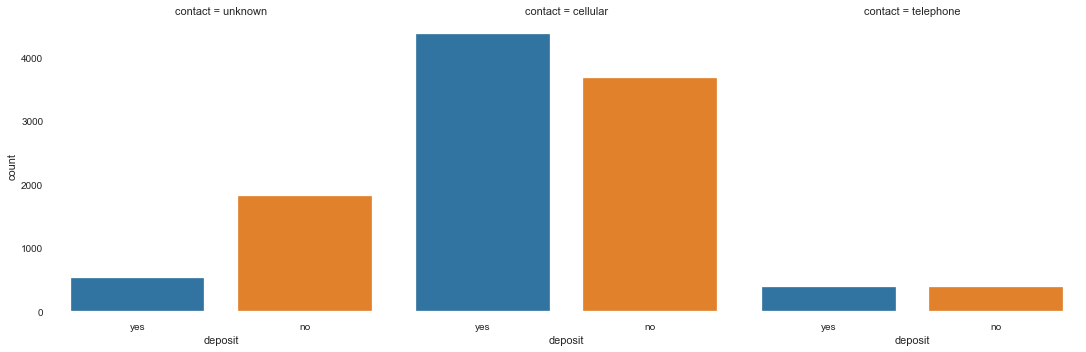

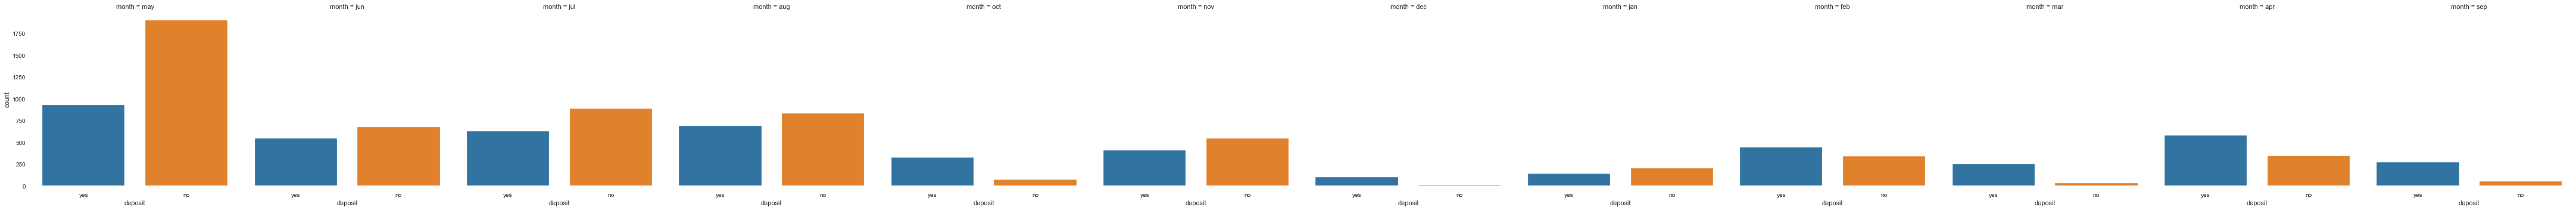

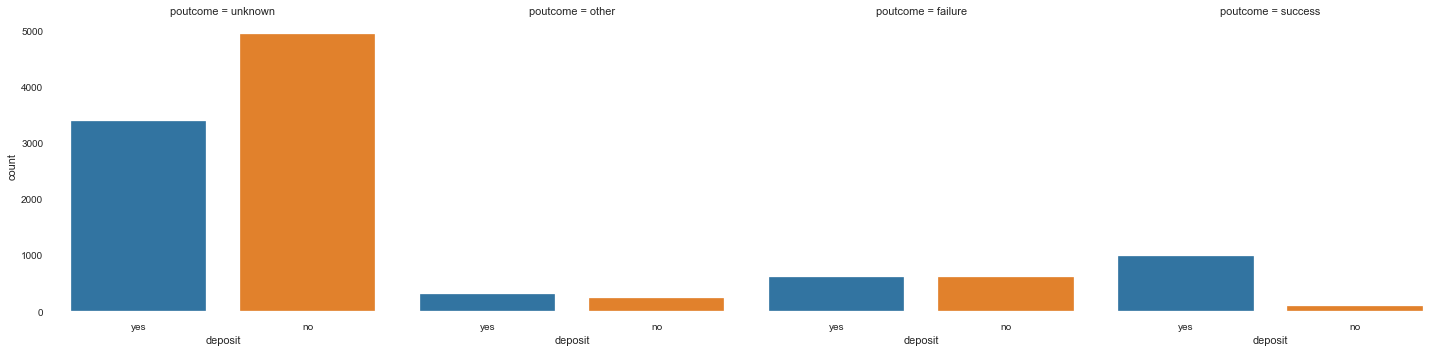

In [153]:
for cat_feature in categorical_features:       # Categorical features using catplot 
    sns.catplot(data= Bank_df, x='deposit', col=cat_feature, kind='count')
plt.show()

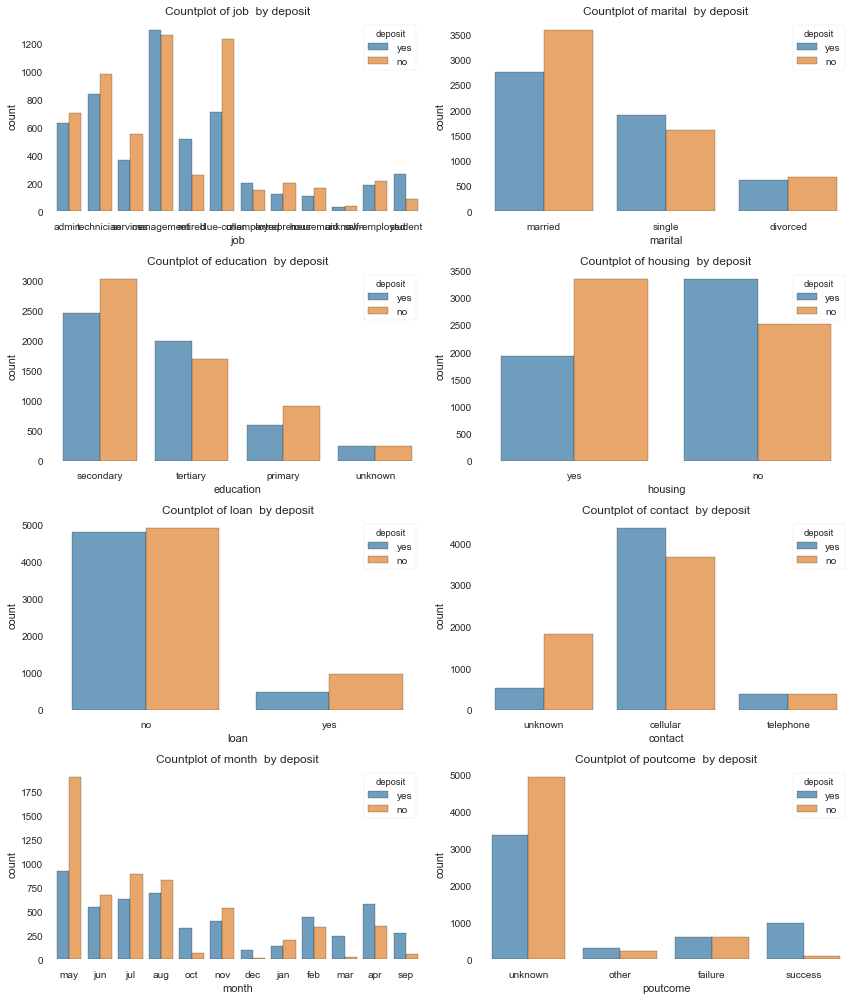

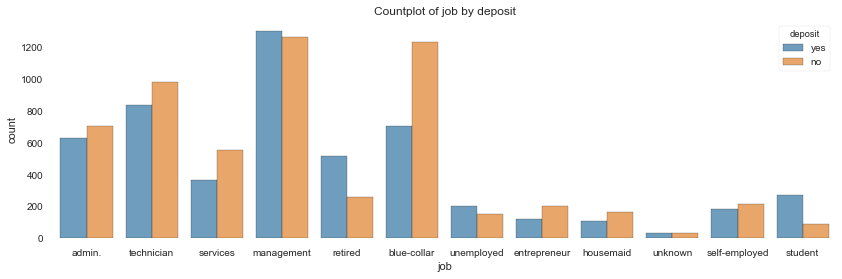

In [154]:
# frequency of each category with label using bar chart


plt.figure(figsize=[12,14])

n=1
for f in categorical_features:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='deposit', edgecolor="black", alpha=0.7, data=Bank_df)
    sns.despine()
    plt.title("Countplot of {}  by deposit".format(f))
    n=n+1
plt.tight_layout()
plt.show()


    
plt.figure(figsize=[14,4])
sns.countplot(x='job', hue='deposit',edgecolor="black", alpha=0.7, data=Bank_df)
sns.despine()
plt.title("Countplot of job by deposit")
plt.show()

In [155]:
for cat_feature in categorical_features:
    print(Bank_df.groupby(['deposit',cat_feature]).size())

deposit  job          
no       admin.            703
         blue-collar      1236
         entrepreneur      205
         housemaid         165
         management       1265
         retired           262
         self-employed     218
         services          554
         student            91
         technician        983
         unemployed        155
         unknown            36
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64
deposit  marital 
no       divorced     671
         married     3596
         single      1606
yes      divorced     622
         married     2755
         single      1912
dtype: int64
deposit  education
no       prima

**Looking at categorical feature distribution using matplotlib**

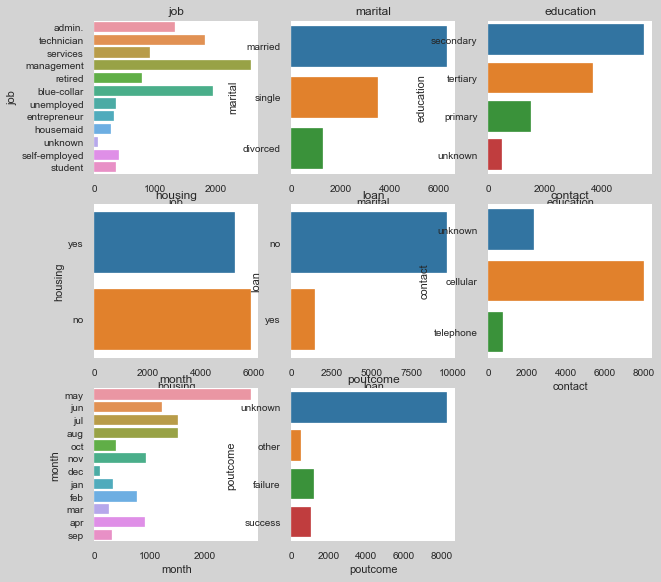

In [157]:
plt.figure(figsize=(10,40), facecolor='LightGray')
pltnum =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,pltnum)
    sns.countplot(data=Bank_df, y=categorical_feature)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    pltnum+=1
plt.show()

**Now, will have a look at the numerical variables**

In [158]:
num_features = [feature for feature in Bank_df.columns if ((Bank_df[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Num of numerical variables: ', len(num_features))

# Cheking out num variables
Bank_df[num_features].head()

Num of numerical variables:  6


age  balance  day  duration  campaign  previous
0   59     2343    5      1042         1         0
1   56       45    5      1467         1         0
2   41     1270    5      1389         1         0
3   55     2476    5       579         1         0
4   54      184    5       673         2         0

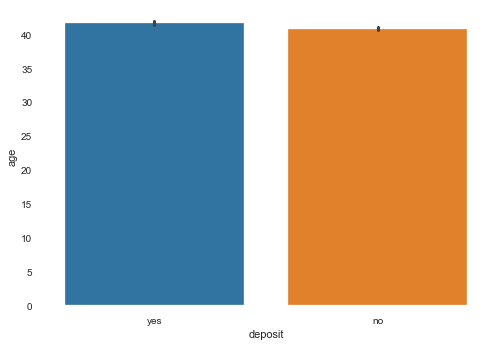

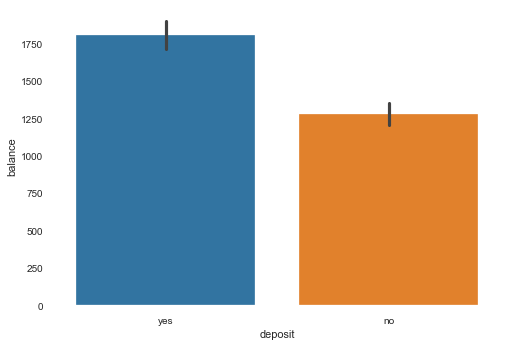

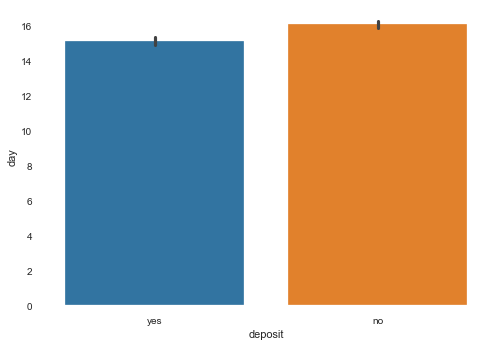

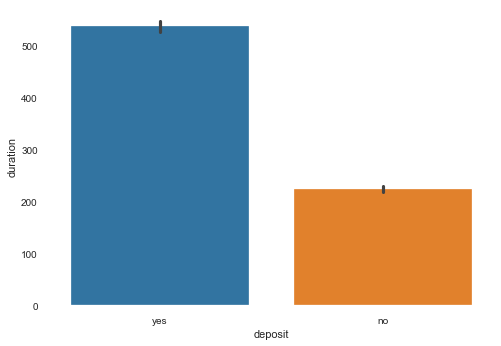

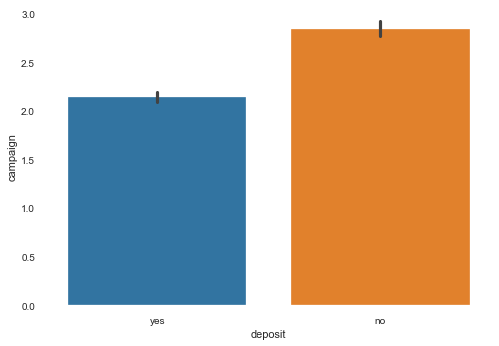

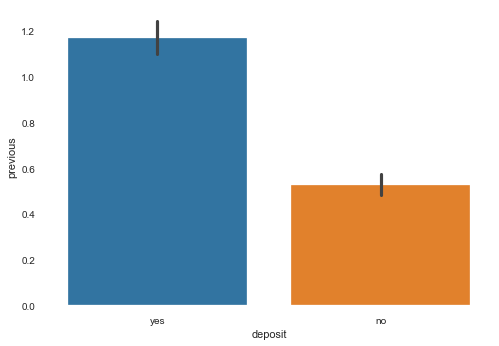

In [159]:
# Exploring numeric data with deposit label using bar chart

for i in num_features:
    sns.barplot(Bank_df.deposit, Bank_df[i])
    plt.show()

**So, there are in total 6 numerical features in the dataset**


**Now, will have to look at which features are having continuous and discrete**

In [160]:
discrete_feature=[feature for feature in num_features if len(Bank_df[feature].unique())<25]
print("Discrete Variables Counts: {}".format(len(discrete_feature)))

Discrete Variables Counts: 0


**There is no discrete feature**

In [161]:
continuous_features=[feature for feature in num_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Counts {}".format(len(continuous_features)))

Continuous feature Counts 6


**There are in total 6 features** 

**Let's see the distribution of continuous features**

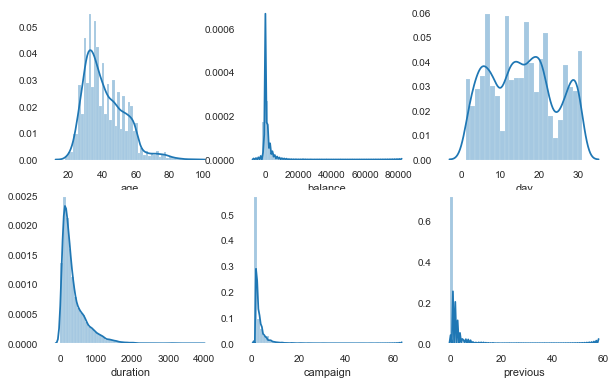

In [162]:
plt.figure(figsize=(10,40), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(Bank_df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

**There are some features such as duration, previous, balance, campaign and pdays are totally left skewed and there are some outliers as well.**

**Whereas, Age and Day have distributed normally**

**Finding Outliers**

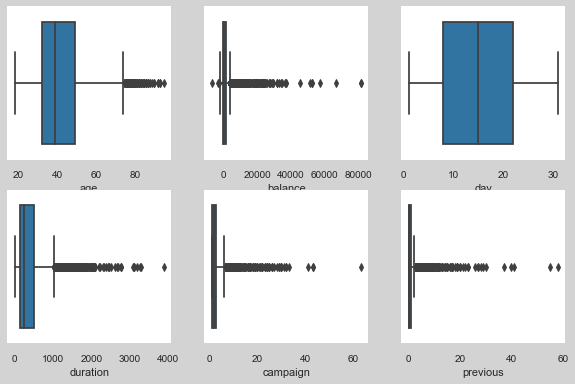

In [163]:
plt.figure(figsize=(10,40), facecolor='lightGray')
pltnum =1
for num_feature in num_features:
    ax = plt.subplot(12,3,pltnum)
    sns.boxplot(Bank_df[num_feature])
    plt.xlabel(num_feature)
    pltnum+=1
plt.show()

**Removing outliers** 

**There are some of outliers but the problem is if we remove that ones then there could be effect in other features as well as most of the features are corelated** 

In [164]:
Bank_df.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
         33             1
         41             1
         43             2
         63             1
yes      1           2561
         2          

**Here, it seems that more than 30 values as outliers in campaign**

In [165]:
bank_df1 = Bank_df[Bank_df['campaign'] < 30]

In [166]:
bank_df1.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
yes      1           2561
         2           1401
         3            618
         4            317
         5            139
         6             92
         7             47
         8             32
         9          

In [167]:
bank_df1.groupby(['deposit','previous'],sort=True)['previous'].count()

deposit  previous
no       0           4929
         1            304
         2            237
         3            141
         4             73
         5             44
         6             34
         7             23
         8             21
         9             10
         10             4
         11             8
         12             6
         13             2
         14             1
         15             4
         16             2
         17             8
         18             1
         19             2
         20             1
         23             1
         27             2
         28             1
         37             1
         40             1
         41             1
yes      0           3383
         1            583
         2            456
         3            294
         4            171
         5            121
         6             83
         7             54
         8             39
         9             24
         10         

In [168]:
bank_df1 = bank_df1[bank_df1['previous'] < 31]

# Installing pandas-profiling for generating Profile Report of the dataset**

In [169]:
pip install pandas-profiling

**Generating Profile Report of this dataset for Exploratory analysis**

In [170]:
from pandas_profiling import ProfileReport
PR = ProfileReport(bank_df1)
PR

**Profile Report gives all the information related to dataframe we want to look at**

**Looking at the corelation analysis part**

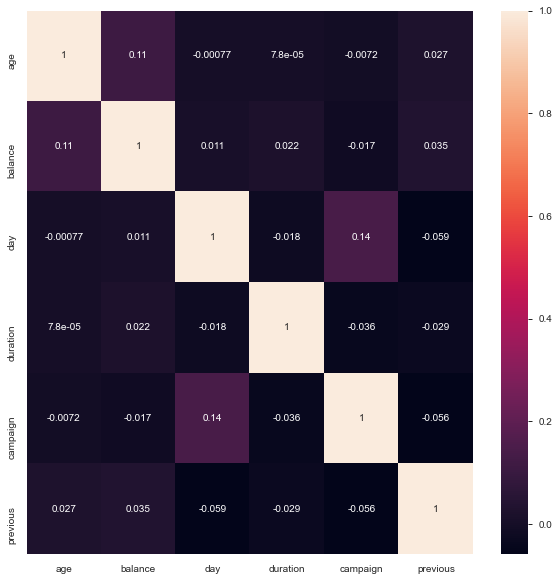

In [111]:
correlation=bank_df1.corr()
fig = plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True)

**Let's have a look at each attribute detail**

- Age 



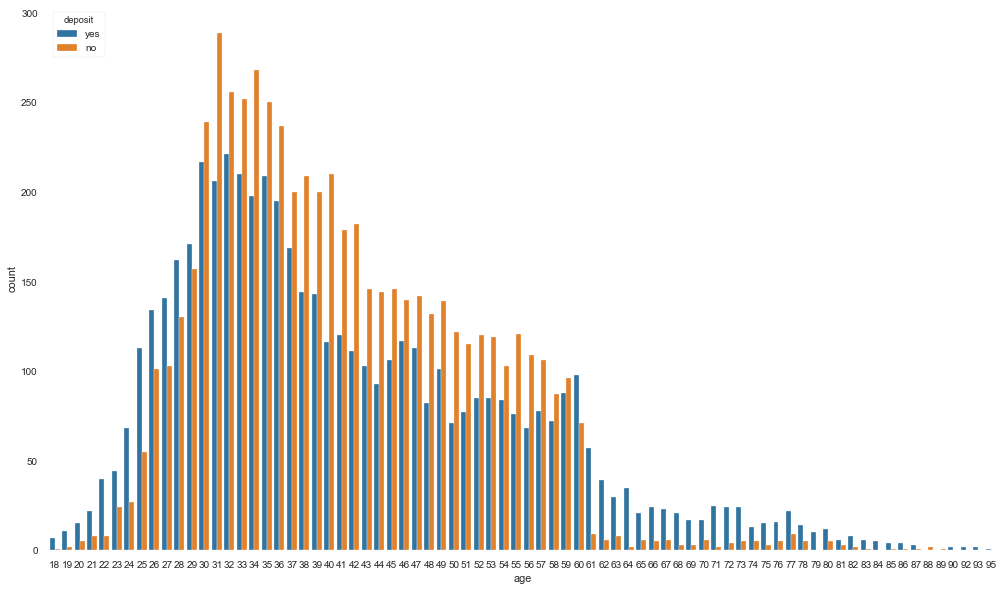

In [171]:
plt.figure(figsize=(17,10))
sns.countplot("age", data=bank_df1, hue="deposit")
plt.show()

For older than 60 age and younger than 30 age customers term deposit ratio dramatically increasing.
Prabably all models will choose age as important attribute

- Job

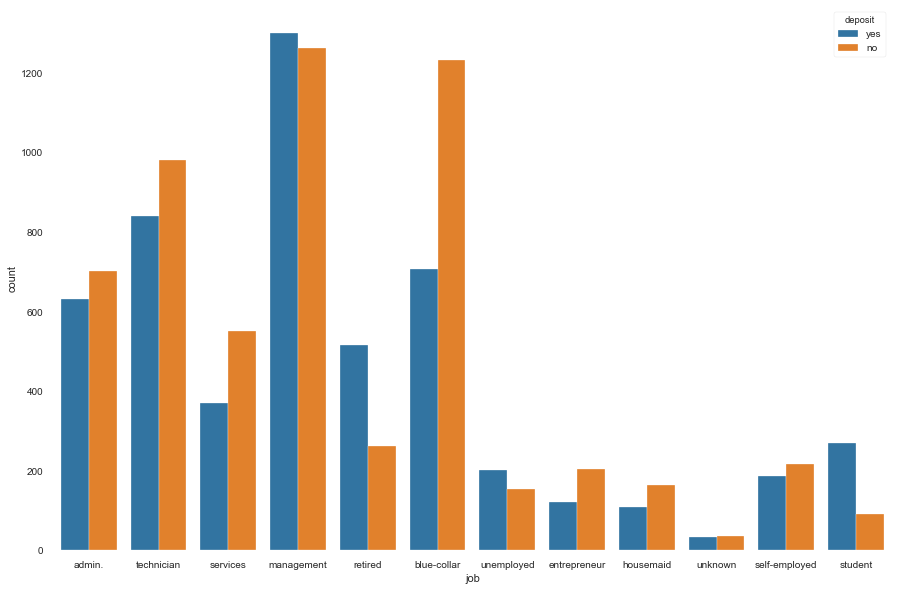

In [174]:
plt.figure(figsize=(15,10))
sns.countplot(x="job",hue="deposit", data=bank_df1)
plt.show()

Student job and Retired categories have the highest deposit customer rates.

- Marital

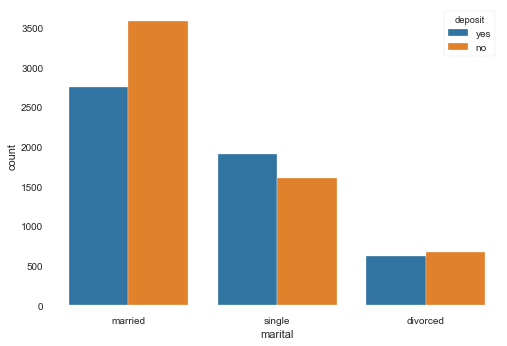

In [175]:
sns.countplot(x="marital", hue="deposit", data= bank_df1)
plt.show()

Lowest one is the married category. Probably most of the people in married category have children
The single category with the highest deposit rate. Singles has money to save

- Education

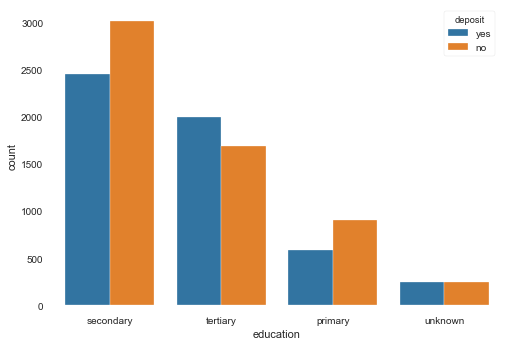

In [177]:
sns.countplot(x="education", hue="deposit", data=bank_df1)
plt.show()

Every category in education has low deposit rate but secondary class has highest deposit ratio among other class and more than that the no deposit ratio as well for secondary than others followed by tertiary, primary and unknown.

- Housing

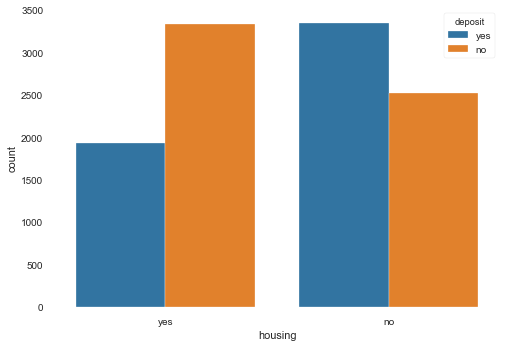

In [179]:
sns.countplot(x="housing", hue="deposit", data=bank_df1)
plt.show()

It is an expected result that those with home loans do not have deposits.
Because these people have chosen to secure their future as homeowners instead of deposits.
Probably it is most correlated variable.

- Loan

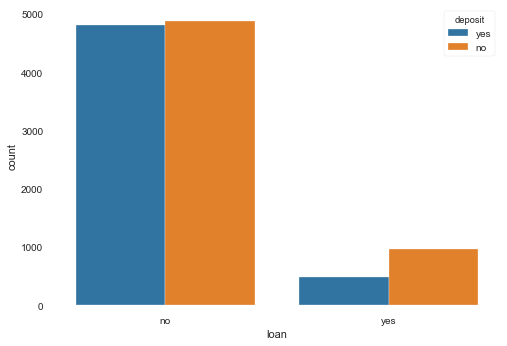

In [180]:
sns.countplot(x="loan", hue="deposit", data=bank_df1)
plt.show()

Loan category is not as much correlated with deposit as housing.

- Balance

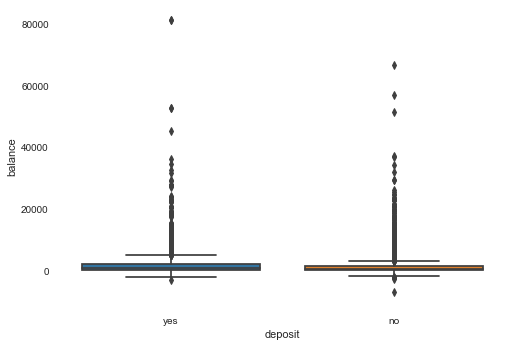

In [181]:
sns.boxplot(x="deposit", y="balance", data=bank_df1)
plt.show()

- Contact

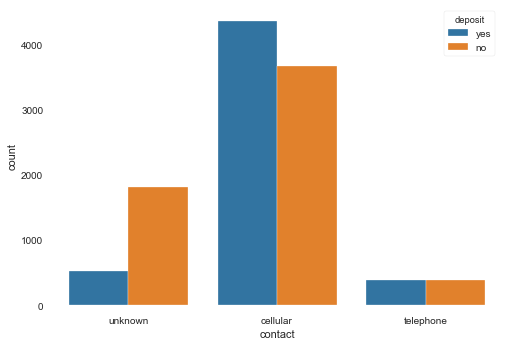

In [182]:
sns.countplot(x="contact",hue="deposit",data=bank_df1)
plt.show()

Look like people having celular phone are in more numbers but the ration of deposit lesser with consideration of these amount of people. whereas, people having telephone has equal ratio of deposit.

- Month

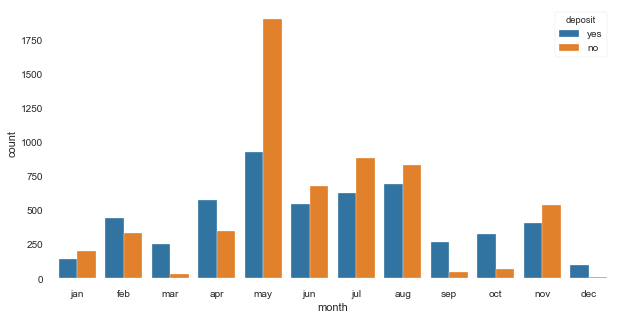

In [183]:
plt.figure(figsize=(10,5))
sns.countplot(x="month",hue="deposit",data=bank_df1,order=("jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"))
plt.show()

Looks like monthly effect on feb,mar,apr,sep,oct,dec.

- Day

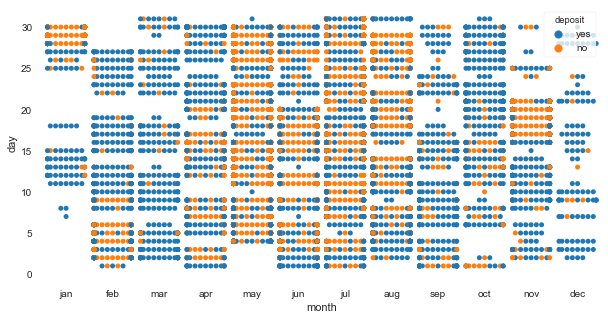

In [184]:
plt.figure(figsize=(10,5))
sns.swarmplot(x="month",y="day",hue="deposit",data=bank_df1,order=("jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"))
plt.show()

That's great view. I think day and month are important attributes.
Potential clients opted to suscribe term deposits during the seasons of fall and winter. The next marketing campaign should focus its activity throghout these seasons.

- Campaign

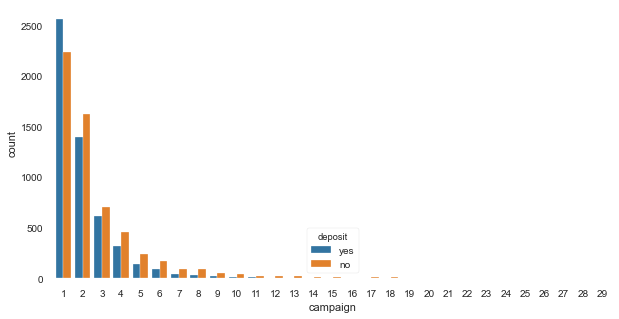

In [185]:
plt.figure(figsize=(10,5))
sns.countplot(x="campaign",hue="deposit",data=bank_df1)
plt.show()

- Privious

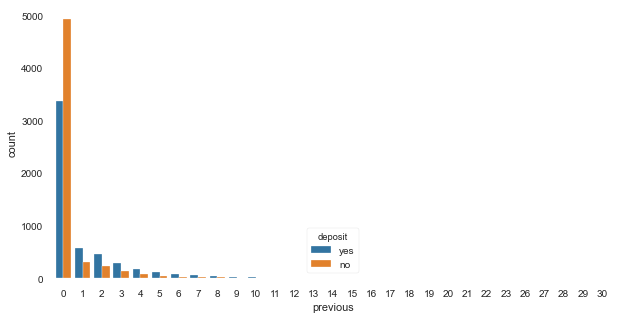

In [187]:
plt.figure(figsize=(10,5))
sns.countplot(x="previous",hue="deposit",data=bank_df1)
plt.show()

- Poutcome

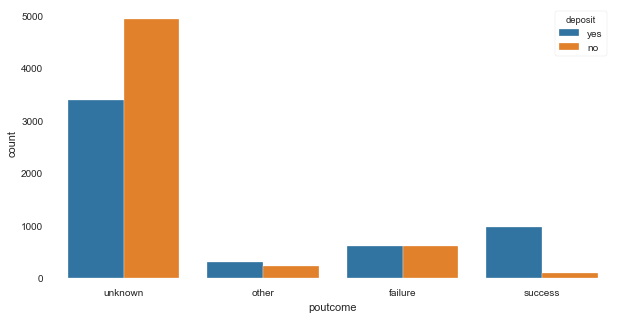

In [188]:
plt.figure(figsize=(10,5))
sns.countplot(x="poutcome",hue="deposit",data=bank_df1)
plt.show()

In [189]:
bank_df1['deposit'].groupby(bank_df1['deposit']).count()

deposit
no     5859
yes    5286
Name: deposit, dtype: int64

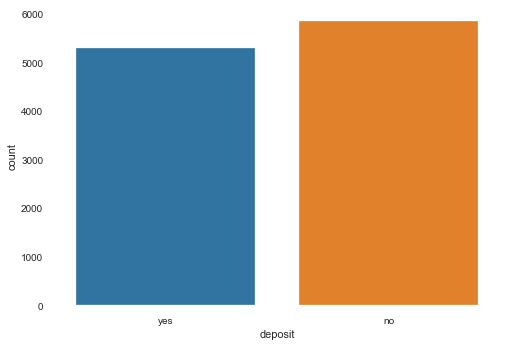

In [190]:
sns.countplot(data=bank_df1, x='deposit')
plt.show()

**Look's like dataframe is ready for pre-processing part**

In [114]:
# handle categorical features


cate_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cate_columns:
    bank_df1 = pd.concat([bank_df1.drop(col, axis=1),pd.get_dummies(bank_df1[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [115]:
bool_columns = ['housing', 'loan', 'deposit']
for col in  bool_columns:
    bank_df1[col+'_1']=bank_df1[col].apply(lambda x : 1 if x == 'yes' else 0)
    bank_df1.drop(col, axis=1, inplace=True)

In [116]:
bank_df1.head()

age  balance  day  duration  campaign  previous  job_blue-collar  \
0   59     2343    5      1042         1         0                0   
1   56       45    5      1467         1         0                0   
2   41     1270    5      1389         1         0                0   
3   55     2476    5       579         1         0                0   
4   54      184    5       673         2         0                0   

   job_entrepreneur  job_housemaid  job_management  ...  month_may  month_nov  \
0                 0              0               0  ...          1          0   
1                 0              0               0  ...          1          0   
2                 0              0               0  ...          1          0   
3                 0              0               0  ...          1          0   
4                 0              0               0  ...          1          0   

   month_oct  month_sep  poutcome_other  poutcome_success  poutcome_unknown  \
0          0          0               0                 0                 1   
1          0          0               0                 0                 1   
2          0          0               0                 0                 1   
3          0          0               0                 0                 1   
4          0          0               0                 0                 1   

   housing_1  loan_1  deposit_1  
0          1       0          1  
1          0       0          1  
2          1       0          1  
3          1       0          1  
4          0       0          1  

[5 rows x 41 columns]

**It looks good**

# Model Building

**Separating out the features and target variable**

In [117]:
x = bank_df1.drop(['deposit_1'], axis=1)      # Feature Variables
y = bank_df1['deposit_1']                     # Target Variable

**Splitting of train & test split**

In [118]:
                                                                # Splitting data into train and test
from sklearn.model_selection import train_test_split           
                                                                # Stratify for equally distribution of values
    
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size = 0.20, random_state=42)  

**Knn - Model pipeline**

In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline 
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# pipeline combining transformers and estimator
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
 
# grid searh to choose the best (combination of) hyperparameters
knn_grids=GridSearchCV(estimator= knn_pipe,
               param_grid={'kneighborsclassifier__n_neighbors':[4,5,6,7]},
               scoring='accuracy',
               cv=5)

# nested cross validation combining grid search (inner loop) and k-fold cv (outter loop)
knn_grids_scores = cross_val_score(knn_grids, X = x_train, y = y_train, cv=5, scoring='accuracy', n_jobs=-1)

# fit, and fit with best estimator
knn_grids.fit(x_train, y_train)
knn_grids_best=knn_grids.best_estimator_
knn_grids_best.fit(x_train, y_train)

print('Train Accuracy:   {0:.1f}%'.format(knn_grids.score(x_train, y_train)*100))
print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(knn_grids_scores)*100))
print('Test Accuracy:    {0:.1f}%'.format(knn_grids.score(x_test, y_test)*100))

Train Accuracy:   82.6%
CV Mean Accuracy: 76.7%
Test Accuracy:    76.5%


**Logistic Regression**

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score



**Let's check each feature with Logistic Regression** 

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform (x_test)

for i in bank_df1.columns:
    X = bank_df1[[i]]
    y = bank_df1['deposit_1']

    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    print("F1 Score :", i, f1_score(pred, y_test))

F1 Score : age 0.8111002921129504
F1 Score : balance 0.8111002921129504
F1 Score : day 0.8111002921129504
F1 Score : duration 0.8111002921129504
F1 Score : campaign 0.8111002921129504
F1 Score : previous 0.8111002921129504
F1 Score : job_blue-collar 0.8111002921129504
F1 Score : job_entrepreneur 0.8111002921129504
F1 Score : job_housemaid 0.8111002921129504
F1 Score : job_management 0.8111002921129504
F1 Score : job_retired 0.8111002921129504
F1 Score : job_self-employed 0.8111002921129504
F1 Score : job_services 0.8111002921129504
F1 Score : job_student 0.8111002921129504
F1 Score : job_technician 0.8111002921129504
F1 Score : job_unemployed 0.8111002921129504
F1 Score : job_unknown 0.8111002921129504
F1 Score : marital_married 0.8111002921129504
F1 Score : marital_single 0.8111002921129504
F1 Score : education_secondary 0.8111002921129504
F1 Score : education_tertiary 0.8111002921129504
F1 Score : education_unknown 0.8111002921129504
F1 Score : contact_telephone 0.8111002921129504
F1

**Now. using all the features with Logistic Regression**

In [44]:
lr = LogisticRegression(random_state=42)
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

In [45]:
print('Report:\n',classification_report(y_test, pred))
print("F1 Score:",f1_score(pred, y_test))
print('confusion Matrix:\n',confusion_matrix(pred, y_test))
print('cross validation:',cross_val_score(lr, X, y, cv=5))

Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      1172
           1       0.84      0.79      0.81      1057

    accuracy                           0.83      2229
   macro avg       0.83      0.82      0.82      2229
weighted avg       0.83      0.83      0.83      2229

F1 Score: 0.8111002921129504
confusion Matrix:
 [[1008  224]
 [ 164  833]]
cross validation: [1. 1. 1. 1. 1.]


**SVM**

In [48]:
from sklearn.svm import SVC

svm_pipe = make_pipeline(StandardScaler(), SVC(random_state=1))

# grid searh to choose the best (combination of) hyperparameters

r=[0.1,1,10]
svm_pg=[{'svc__C':r, 'svc__kernel':['linear']},
        {'svc__C':r, 'svc__gamma':r, 'svc__kernel':['rbf']}]

svm_gs=GridSearchCV(estimator= svm_pipe,
               param_grid= svm_pg,
               scoring='accuracy',
               cv=2)

# nested cross validation combining grid search (inner loop) and k-fold cv (outter loop)
svm_gs_scores = cross_val_score(svm_gs, X=x_train, y=y_train, cv=5, scoring='accuracy', n_jobs=-1)

# fit, and fit with best estimator
svm_gs.fit(x_train, y_train)
svm_gs_best=svm_gs.best_estimator_
svm_gs_best.fit(x_train, y_train)

print('Train Accuracy:   {0:.1f}%'.format(svm_gs.score(x_train, y_train)*100))
print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(svm_gs_scores)*100))
print('Test Accuracy:    {0:.1f}%'.format(svm_gs.score(x_test, y_test)*100))

Train Accuracy:   82.9%
CV Mean Accuracy: 82.7%
Test Accuracy:    82.7%


**Multiple models**

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

In [49]:
# Selecting the model which model we want to use and here we have taken four models and will be using all the models 
# And will see the accuracy from all the models otcome.
def getModel():
    from random import randint
    # creating dictionary for all the four models
    models = {1: [RandomForestClassifier(5), { 'n_estimators': list(range(randint(4,200)))}],
              2: [SVC(), {'kernel':('linear', 'rbf'), 'C':[1, 10]}], 
              3: [KNeighborsClassifier(5),{'n_neighbors': list(range(1, 31))} ], 
              4: [DecisionTreeClassifier(), {"max_features":list(range(randint(0, 5)))}]}
    # Taking user input
    x = int(input("Enter which model to use:\n1: RandomforestClassifier\n2: SVM\n3: kNN\n4: DecisionTree"))
    return models[x]

In [50]:
# Created KFold for 4 folds which can be used for cross validation score with four folds.
def kFold():
    scores = []
    # 4 iterations
    for i in range(4):
        # Creating four folds 
        # Creating k-fold of 4 folds with random-state of 6333
        cv = KFold(n_splits=4, shuffle=True, random_state=42) 
        # Appending score in scores list
        # Taking the user inserted model and training the data with every folds
        scores.append(cross_val_score(getModel()[0], x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)) 
    # Going through all the accuracy 
    for i in scores:
        # Printing out all the accuracied and minimum accuracy, maximum accuracy and average of accuracy
        print (min(i), max(i), sum(i)/len(i))

In [51]:
# Processes of scanning the data to configure optimal parameters for a given model
def searchGridCV(x_train, y_train, xtest, ytest):
    # Calling the getmodel()
    M = getModel()
    # Printing out the models
    print (M)
    # Assigning the model and it's parameters to variables named m and parameters respectively.
    m, parameters = M[0], M[1]
    model = RandomizedSearchCV(estimator = m, param_distributions = parameters)
    # Training the data
    
    Train_Acc_Score_CV = model.fit(x_train, y_train)
    # Printing out the accuracy
    Test_Acc_Score_CV = model.score(x_test, y_test)
    print( "accuracy", Train_Acc_Score_CV)

In [55]:
for i in range(4):
    # Taking the user input model and simple taking out accuracy
    model = getModel()[0]
    # Training the data
    m = model.fit(x_train, y_train)
    m
    
    Train_Acc_Score = m.score(x_train, y_train)
    print(Train_Acc_Score)
    Test_Acc_Score = m.score(x_test, y_test)
    print(Test_Acc_Score)
    
    # model.fit(X, Y)
    # Printing out the score of all the models used one by one
    #Acc_Score = model.score(xtest, ytest)
    #Acc_Score

#searchGridCV(X, Y, xtest, ytest)
#kFold()

Enter which model to use:
1: RandomforestClassifier
2: SVM
3: kNN
4: DecisionTree1
0.9775684163301929
0.8308658591296546
Enter which model to use:
1: RandomforestClassifier
2: SVM
3: kNN
4: DecisionTree2
0.8790937640197398
0.8510542844324809
Enter which model to use:
1: RandomforestClassifier
2: SVM
3: kNN
4: DecisionTree3
0.8411843876177658
0.7635711081202333
Enter which model to use:
1: RandomforestClassifier
2: SVM
3: kNN
4: DecisionTree4
1.0
0.7738896366083445


In [60]:
kFold()

Enter which model to use:
1: RandomforestClassifier
2: SVM
3: kNN
4: DecisionTree1
Enter which model to use:
1: RandomforestClassifier
2: SVM
3: kNN
4: DecisionTree2
Enter which model to use:
1: RandomforestClassifier
2: SVM
3: kNN
4: DecisionTree3
Enter which model to use:
1: RandomforestClassifier
2: SVM
3: kNN
4: DecisionTree4
0.7963212202781517 0.822790489008524 0.8120233288470166
0.8344549125168237 0.8492597577388964 0.8435397039030956
0.7492148945715568 0.7671601615074024 0.759421265141319
0.7779273216689099 0.7967698519515478 0.7895917451772095


In [65]:
from sklearn.naive_bayes import GaussianNB
naive_bayes=GaussianNB()
from sklearn.model_selection import cross_val_score
scores_naive = cross_val_score(naive_bayes, x_train, y_train, cv=10)
print("Naive Bayes")
scores_naive

Naive Bayes


array([0.71973094, 0.70067265, 0.69058296, 0.70964126, 0.71188341,
       0.71300448, 0.69135802, 0.72502806, 0.68911336, 0.7037037 ])

**Naive Bayes doesn't work well with bigger datasets**

**Catboost algorithm**

In [68]:
pip install catboost

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=bd125ee663ac6c744a22bc80b0064e4d5538611c80853272a666eedac360f561
  Stored in directory: c:\users\anant\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [72]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=1000,verbose=0)

cat.fit(x_train,y_train)
ypred=catb.predict(x_test)

import sklearn.metrics as metrik
print(metrik.confusion_matrix(y_true=y_test, y_pred=ypred))
print(metrik.accuracy_score(y_true=y_test, y_pred=ypred))

[[988 184]
 [125 932]]
0.8613728129205922


**By doing gradient boosting using CatBoost algorithm gives better accuracy**

In [123]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [129]:
import xgboost as xgb
# metrics
from sklearn.metrics import accuracy_score 

xg = xgb.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xg.fit(x_train, y_train.squeeze().values)

y_train_pred1 = xg.predict(x_train)
y_test_pred1 = xg.predict(x_test)

print('XGB accuracy score for train:',
        accuracy_score(y_train, y_train_pred1),
        accuracy_score(y_test, y_test_pred1))

[19:32:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB accuracy score for train: 0.9096007178106774 0.8649618663077613


**Gradient Boosting classifier is the best model to predict whether or not a potential client will subscribe to a term deposit or not. 86% accuracy!** 

**Confusion Matrix**

In [193]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_test, xg.predict(x_test))
cmat

array([[986, 186],
       [115, 942]], dtype=int64)

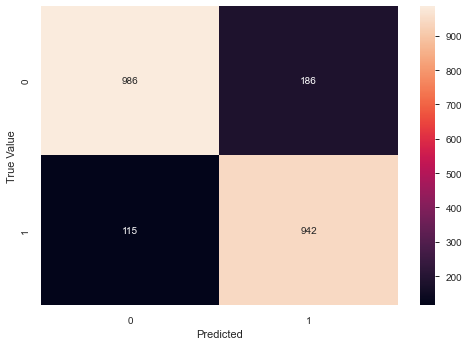

In [195]:
#plot the graph

from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cmat, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

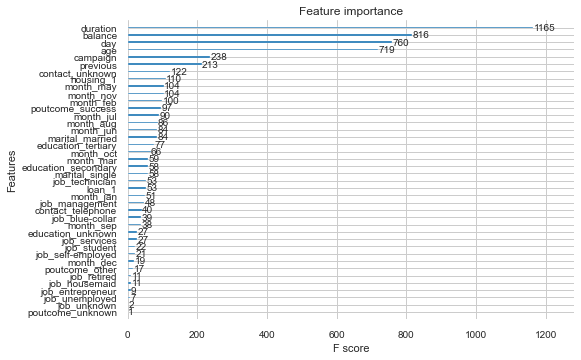

In [135]:
from xgboost import plot_importance
from matplotlib import pyplot

plot_importance(xg)
pyplot.show()

As we can see from the diagram showing feature importances, the most important features are:

- Customer's account balance,
- Customer's age,
- Number of contacts performed during this campaign and contact duration,
- Number of contacts performed before this campaign.

So the main outcomes of the modelling are:

- Customers of greater age are more likely to subscribe for the term deposit.
- Customers with greater account balance are more likely to subscribe for the term deposit.
- Number of contacts with the customers really matters. Too many contacts with the customer could make him decline the offer.
- The people who younger than 30 and older than 60 years old most likely to subscribe for term deposit.
- Age attribute confirmed with job attribute. Because Retired and Students are most likely to subscribe for term deposit.
- Customers with 'blue-collar' and 'services' jobs are less likely to subscribe for term deposit.
- Divorced have a considerably low amount of balance.
- Education significant impact the amount of balance.
- Customers are more willing to invest either before 8th or after 23rd of the month.
- Potential clients opted to suscribe term deposits during the seasons of fall and winter.
- Potential clients in the low balance and no balance category were more likely to have a house loan than people in the average and high balance category. What does it mean to have a house loan? This means that the potential client has financial compromises to pay back its house loan and thus, there is no cash for he or she to suscribe to a term deposit account. However, we see that potential clients in the average and hih balances are less likely to have a house loan and therefore, more likely to open a term deposit. Lastly, the next marketing campaign should focus on individuals of average and high balances in order to increase the likelihood of suscribing to a term deposit.
- Target individuals with a higher duration (above 375): Target the target group that is above average in duration, there is a highly likelihood that this target group would open a term deposit account. The likelihood that this group would open a term deposit account is at 78% which is pretty high. This would allow that the success rate of the next marketing campaign would be highly successful.